In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam

In [9]:
stem = "/home/ubuntu/Phase/"
stem_label = "/home/ubuntu/Mask/"

In [10]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(stem) if isfile(join(stem, f))]

In [11]:
imgNames = os.listdir(stem)
imgNames.sort()
labelImgNames = os.listdir(stem_label)
labelImgNames.sort()

numImages = 1500
split_ratio = 0.95
trainImage = int(numImages*split_ratio)
testImage = numImages - trainImage
numRows = 256
numCols = 256
X_train = np.zeros((trainImage,numRows,numCols,1))
Y_train = np.zeros(X_train.shape)


X_test = np.zeros((testImage,numRows,numCols,1))
Y_test = np.zeros(X_test.shape)

for i in range(numImages): 
    if i<trainImage:
        
        fname = stem + imgNames[i]
        img = plt.imread(fname)
        img = img[:,:,0]
        X_train[i,:,:,0] = img[0:numRows,0:numCols]
    
    
        fname = stem_label + labelImgNames[i]
        img = plt.imread(fname) 
        img = img[:,:,0]
        Y_train[i,:,:,0] = img[0:numRows,0:numCols]
       
    
    
    else :
        fname = stem + imgNames[i]
        img = plt.imread(fname)
        img = img[:,:,0]
        X_test[i-trainImage,:,:,0] = img[0:numRows,0:numCols]
        
        
        fname = stem_label + labelImgNames[i]
        img = plt.imread(fname) 
        img = img[:,:,0]
        Y_test[i-trainImage,:,:,0] = img[0:numRows,0:numCols]
           
        

X_train = X_train/255.0
Y_train = Y_train/255.0

X_test = X_test/255.0
Y_test = Y_test/255.0

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=.2)




In [13]:
X_val.shape


(285, 256, 256, 1)

In [14]:
X_test.shape

(75, 256, 256, 1)

In [15]:
X_train.shape

(1140, 256, 256, 1)

In [16]:
tf.test.is_gpu_available()

False

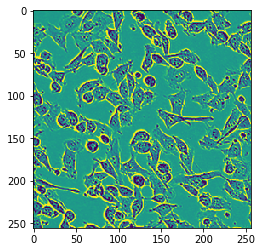

In [17]:
plt.imshow(X_test[10,:,:,0])

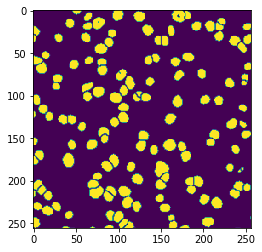

In [18]:
plt.imshow(Y_test[10,:,:,0])

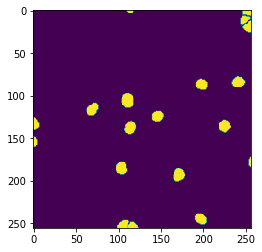

In [19]:
plt.imshow(Y_val[2,:,:,0])

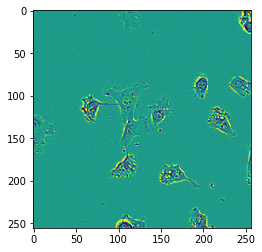

In [20]:
plt.imshow(X_val[2,:,:,0])

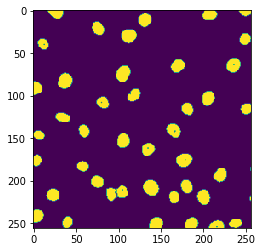

In [21]:
plt.imshow(Y_train[500,:,:,0])

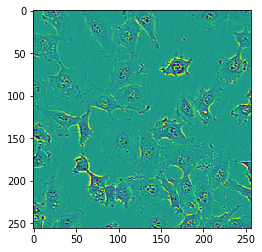

In [22]:
plt.imshow(X_train[500,:,:,0])


In [23]:
inputs = Input((numRows, numCols, 1))
conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(inputs)
conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(conv1)
pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(pool1)
conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(conv2)
pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(pool2)
conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(conv3)
pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(pool3)
conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(conv4)
pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(pool4)
conv5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(conv5)

up6 = layers.concatenate([layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(up6)
conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

up7 = layers.concatenate([layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(up7)
conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

up8 = layers.concatenate([layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up8)
conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

up9 = layers.concatenate([layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up9)
conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

conv10 = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv9)

model = Model(inputs=[inputs], outputs=[conv10])

model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

hst = model.fit(X_train,Y_train, epochs =10 , batch_size = 4, validation_data = (X_val,Y_val))

W1114 06:37:05.916111 139851972687616 deprecation.py:506] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1114 06:37:06.245731 139851972687616 deprecation.py:323] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1140 samples, validate on 285 samples
Epoch 1/10
  32/1140 [..............................] - ETA: 19:42 - loss: 0.5632 - acc: 0.6635

KeyboardInterrupt: 

In [ ]:
# Load TENSORBOARD
%load_ext tensorboard
# Start TENSORBOARD
#%tensorboard --logdir logs --host localhost
#%tensorboard --logdir {logs_base_dir}  --host localhost


#%load_ext tensorboard
%tensorboard --logdir logs


Text(0.5, 1.0, 'Accuracy vs. epoch')

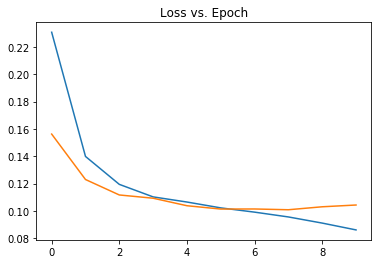

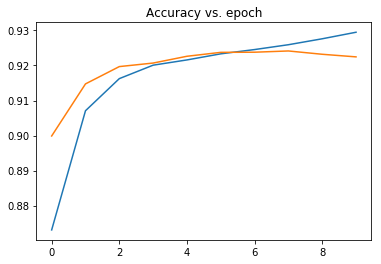

In [16]:
hst.history.keys()
plt.figure()
plt.plot(hst.history['loss'])
plt.plot(hst.history['val_loss'])
plt.title("Loss vs. Epoch")
plt.figure()
plt.plot(hst.history['acc'])
plt.plot(hst.history['val_acc'])
plt.title("Accuracy vs. epoch")

In [20]:
#X_test = np.zeros((1,numRows,numCols,1))
#imgName = imgNames[numImages+1]
#imgName = imgNames[22]
#testImg = plt.imread(stem + imgName)
#testImg = testImg[:,:,0]
#X_test[0,:,:,0] = testImg[0:numRows,0:numCols]
#X_test = X_test/255.0

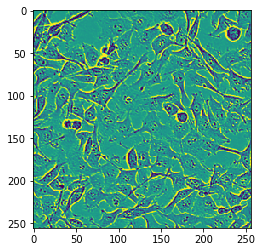

In [35]:
X_testImg = np.zeros((1,numRows,numCols,1))
testImg=X_test[1,:,:,0]
X_testImg[0,:,:,0] = testImg

plt.imshow(X_testImg[0,:,:,0])


In [37]:
X_testImg.shape

(1, 256, 256, 1)

In [36]:

check = model.predict(X_testImg)
predictions = check > .5

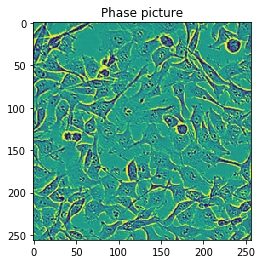

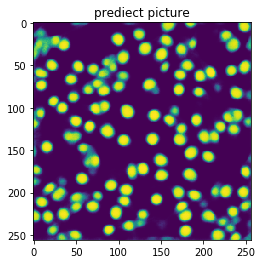

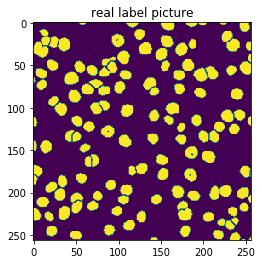

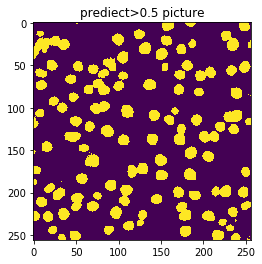

In [26]:
plt.figure()
plt.title("Phase picture")
plt.imshow(X_testImg[0,:,:,0])

plt.figure()
plt.title("prediect picture")
plt.imshow(check[0,:,:,0])

plt.figure()
plt.title("real label picture")
plt.imshow(Y_test[1,:,:,0])


plt.figure()
plt.title("prediect>0.5 picture")
plt.imshow(predictions[0,:,:,0])





In [119]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 256, 256, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_19[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_20[0][0]                  
____________________________________________________________________________________________

In [120]:
model.save('my_model.h5')

In [11]:
new_model = tf.keras.models.load_model('my_model.h5')

W1105 05:49:41.734037 140454281856768 deprecation.py:506] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1105 05:49:41.735004 140454281856768 deprecation.py:506] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1105 05:49:41.746447 140454281856768 deprecation.py:506] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/

In [12]:
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 256, 256, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_19[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_20[0][0]                  
____________________________________________________________________________________________

In [15]:
check = new_model.predict(X_testImg)

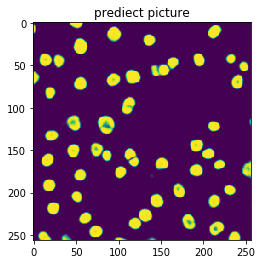

In [16]:
plt.figure()
plt.title("prediect picture")
plt.imshow(check[0,:,:,0])

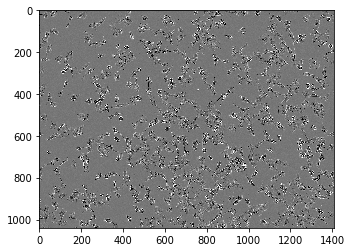

In [63]:

blindTest = "/home/ubuntu/BlindTest/L8_SSP_CPR_IC30_H1_1_00d00h00m.tif"
blindImg = plt.imread(blindTest)

plt.imshow(blindImg)


#stem = "/home/ubuntu/Phase/"

In [69]:
X_blind=np.zeros((20,numRows,numCols,1))
z =0
for i in range(4):
    for j in range(5):
        #print (i)
        startRow = numRows*i
        endRow=numRows*(i+1)
        startCols=numCols*j
        endCols =numCols*(j+1)
        print(startRow)
        
        #blindImg1 = blindImg[startRow:endRow,startCols:endCols]
        #blindImg1 = blindImg1[:,:,0]
        #plt.imshow(blindImg1.shape)
        #X_blind[z,:,:,0] = blindImg1
        z=z+1
        #print(z)

        




0
0
0
0
0
256
256
256
256
256
512
512
512
512
512
768
768
768
768
768


In [3]:
plt.imshow(X_blind[0,:,:,0])

NameError: name 'X_blind' is not defined

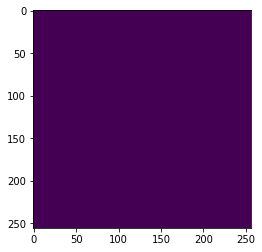

In [56]:
X_testImg = np.zeros((1,numRows,numCols,1))
testImg=X_blind[0,:,:,0]
X_testImg[0,:,:,0] = testImg

plt.imshow(X_testImg[0,:,:,0])

In [39]:
X_testImg.shape

(1, 256, 256, 1)

In [42]:
check = model.predict(X_testImg)
predictions = check > .5

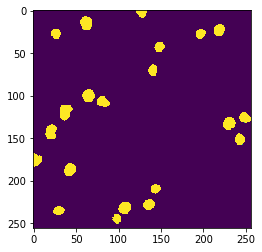

In [45]:
plt.imshow(check[0,:,:,0])

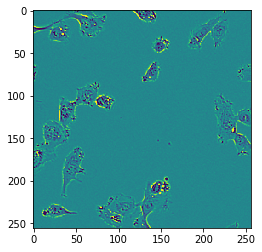

In [6]:
blindTest = "/home/ubuntu/BlindTest/L8_SSP_CPR_IC30_H1_1_00d00h00m.tif"
blindImg = plt.imread(blindTest)

plt.imshow(blindImg[0:256,0:256,1])


In [5]:
blindImg.shape

(1040, 1408, 3)